In [152]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
import pymysql

# Create a PySpark session
spark = SparkSession \
        .builder \
        .appName('DataViz') \
        .config("spark.jars", "C:\spark\jars\mysql-connector-java-8.3.0.jar") \
        .getOrCreate()

In [153]:

#Retrieving Data from FailureRate table in the database
crashesTypeDF = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:mysql://localhost:3306/bigdataproj") \
    .option("dbtable", "(SELECT * FROM failurerate order by failureRate desc LIMIT 10) as crashesType") \
    .option("user", "root") \
    .option("password", "") \
    .load()

crashesTypeDF.show()

+--------------------+-----------+
|                type|failureRate|
+--------------------+-----------+
|        Douglas DC-3|        322|
|de Havilland Cana...|         78|
|       Douglas C-47A|         72|
|        Douglas C-47|         57|
|        Douglas DC-4|         39|
|     Yakovlev YAK-40|         38|
|       Antonov AN-26|         36|
|    Junkers JU-52/3m|         33|
|       Douglas C-47B|         28|
|       Douglas DC-6B|         27|
+--------------------+-----------+



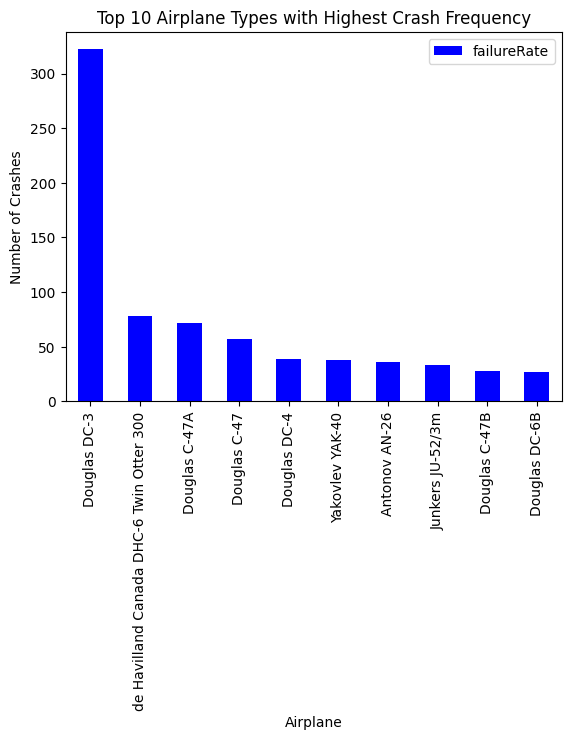

In [154]:
pandasType = crashesTypeDF.toPandas()
pandasType.plot(kind="bar", x="type", y="failureRate", color="blue")
plt.title("Top 10 Airplane Types with Highest Crash Frequency")
plt.xlabel("Airplane")
plt.ylabel("Number of Crashes")
plt.show()

In [155]:
#Retrieving Data from CrashesInPlace table in the database
crashesAreaDF = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:mysql://localhost:3306/bigdataproj") \
    .option("dbtable", "(SELECT * FROM crashesinplace order by crashesInPlace desc LIMIT 10) as crashesArea") \
    .option("user", "root") \
    .option("password", "") \
    .load()

crashesAreaDF.show()

+-----------+--------------+
|   location|crashesInPlace|
+-----------+--------------+
|     Brazil|           175|
|     Alaska|           173|
|     Russia|           166|
|   Colombia|           143|
| California|           138|
|     France|           121|
|      India|            93|
|    England|            85|
|     Mexico|            80|
|  Indonesia|            79|
+-----------+--------------+



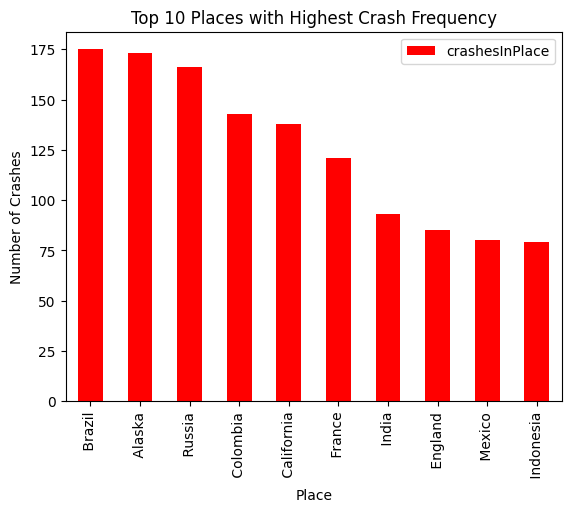

In [156]:
pandasArea = crashesAreaDF.toPandas()
pandasArea.plot(kind="bar", x="location", y="crashesInPlace", color="red")
plt.title("Top 10 Places with Highest Crash Frequency")
plt.xlabel("Place")
plt.ylabel("Number of Crashes")
plt.show()

In [157]:
#Retrieving Data from CrashesInYear table in the database
crashesTimeDF = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:mysql://localhost:3306/bigdataproj") \
    .option("dbtable", "(SELECT * FROM crashesinyear order by crashesInYear desc LIMIT 10) as crashesTime") \
    .option("user", "root") \
    .option("password", "") \
    .load()

crashesTimeDF.show()

+----+-------------+
|date|crashesInYear|
+----+-------------+
|1972|          101|
|1968|           92|
|1989|           91|
|1967|           89|
|1979|           89|
|1973|           88|
|1991|           86|
|1970|           84|
|1992|           84|
|1994|           83|
+----+-------------+



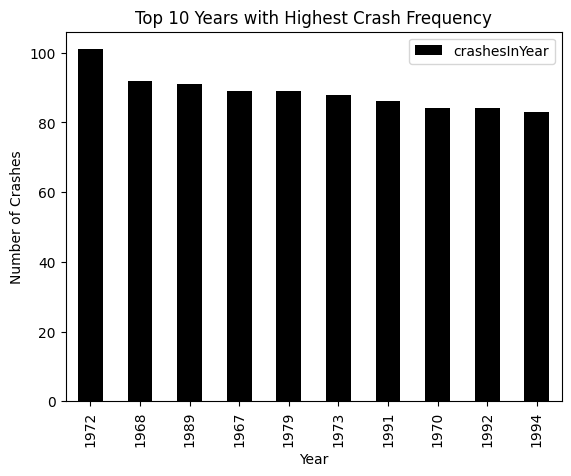

In [158]:
pandasTime = crashesTimeDF.toPandas()
pandasTime.plot(kind="bar", x="date", y="crashesInYear", color="black")
plt.title("Top 10 Years with Highest Crash Frequency")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.show()

In [159]:
# Stop the Spark session
spark.stop()
